# Association Analysis

## Introduction

Apriori algorithm is the perfect algorithm to start with association analysis as it is not just easy to understand and interpret but also to implement.

Python has many libraries for apriori implementation. One can implement the algorithm from scratch. The mlxtend  library implementation of apriori and allows us to extract association rules from data.



## Question 1
Import the required python libraries
We will make use of the following python libraries (note you may need to use pip or conda)

1. pandas and numpy?
2. mlxtend or ML extended will be used for apriori implementation and extracting association rules.
3. And matplotlib for visualizing results

Read data from retail_data.csv available on the lab folder and print the first 10 rows.



In [1]:
%pip install mlxtend

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
## read data from the csv file on local system.
df = pd.read_csv("retail_dataset.csv")


## Print first 10 rows 
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


## Question 2
Each row of the dataset represents items that were purchased together on the same day at the same store.The dataset is a sparse dataset as relatively high percentage of data is NA or NaN or equivalent. These NaNs make it hard to read the table. 

Find out how many unique items are actually in the table.


In [39]:
#Note: There are only 9 items in total that make up the entire dataset. 
#HINT: use the df[col].unique() method

df = df.dropna()
print(df.shape)
uniques = pd.unique(df.values.ravel())
print(uniques)

(41, 7)
['Bread' 'Wine' 'Eggs' 'Meat' 'Cheese' 'Pencil' 'Diaper' 'Milk' 'Bagel']


## Question 3
### Data Preprocessing

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data.

Custom One Hot Encoding



In [40]:
#HINT: TransactionEncoder() read the tutorial 
from mlxtend.preprocessing import TransactionEncoder

ary = df.to_numpy()

te = TransactionEncoder()

te_ary = te.fit(ary).transform(ary)

print(te.columns_)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

['Bagel', 'Bread', 'Cheese', 'Diaper', 'Eggs', 'Meat', 'Milk', 'Pencil', 'Wine']


,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,True,True,True,True,True,False,True,True
1,False,True,True,True,False,True,True,True,True
2,True,True,False,True,True,False,True,True,True
3,True,False,True,True,True,True,False,True,True
4,True,True,False,True,True,True,True,False,True
5,False,True,True,False,True,True,True,True,True
6,False,True,True,True,False,True,True,True,True
7,True,True,True,False,True,False,True,True,True
8,True,True,True,True,True,False,True,False,True
9,False,True,True,True,True,True,True,False,True


## Question 4
### Applying Apriori

apriori module from mlxtend library provides fast and efficient apriori implementation.

    apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)

Parameters

    df : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
    min_support : Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected.
    # of observation with item / total observation# of observation with item / total observation
    use_colnames : This allows to preserve column names for itemset making it more readable.
    max_len : Max length of itemset generated. If not set, all possible lengths are evaluated.
    verbose : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations.
    low_memory :
    If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3–6x slower than the default.

In [41]:
# Use mlxtend apriori() The output is a data frame with the support for each itemsets.

#Finish the code below
freq_items = apriori(df, min_support=0.0001, use_colnames=True)

freq_items.head(7)

,support,itemsets
0,0.682927,(Bagel)
1,0.829268,(Bread)
2,0.829268,(Cheese)
3,0.682927,(Diaper)
4,0.780488,(Eggs)
5,0.829268,(Meat)
6,0.707317,(Milk)


## Question 5
### Mining Association Rules

Frequent if-then associations called association rules which consists of an antecedent (if) and a consequent (then).

    association_rules(df, metric=’confidence’, min_threshold=0.8, support_only=False)

Metric can be set to confidence, lift, support, leverage and conviction.

In [42]:
# I have assumed that the output from Q4 is called freq_items
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Bagel),0.829268,0.682927,0.512195,0.617647,0.904412,-0.054134,0.829268,-0.382353
1,(Bagel),(Bread),0.682927,0.829268,0.512195,0.750000,0.904412,-0.054134,0.682927,-0.250000
2,(Bagel),(Cheese),0.682927,0.829268,0.512195,0.750000,0.904412,-0.054134,0.682927,-0.250000
3,(Cheese),(Bagel),0.829268,0.682927,0.512195,0.617647,0.904412,-0.054134,0.829268,-0.382353
4,(Bagel),(Diaper),0.682927,0.682927,0.487805,0.714286,1.045918,0.021416,1.109756,0.138462


### Visualizing results

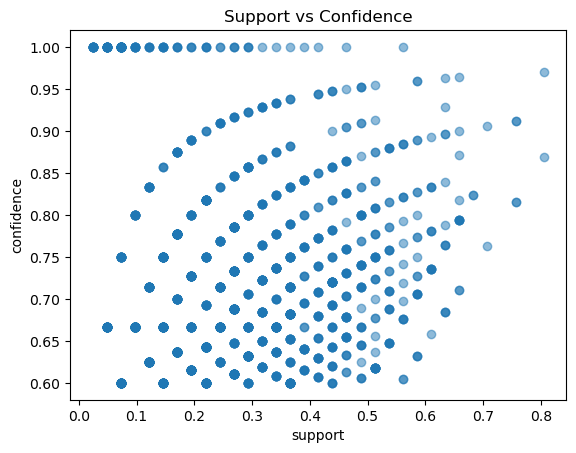

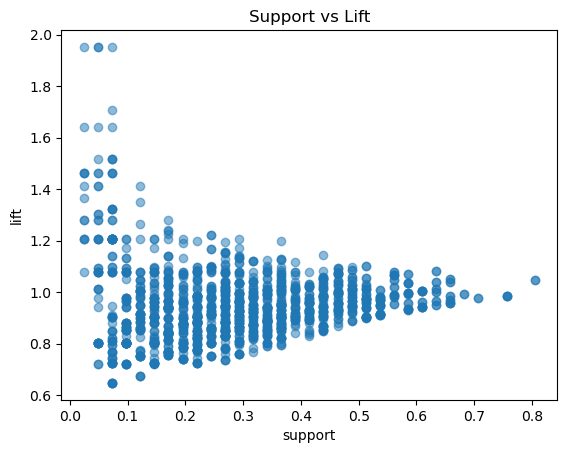

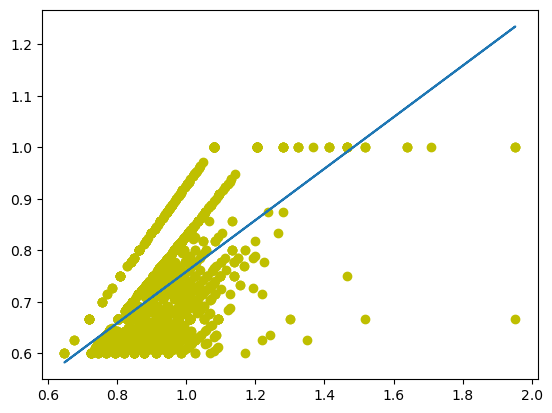

In [43]:
#Support vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#Support vs Lift

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#Lift vs Confidence

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))